# Google Advanced Data Analytics Capstone

## The task  
You are a data professional working for Salifort Motors.   

Currently, there is a high rate of turnover among Salifort employees. (Note: In this context, turnover data includes both employees who choose to quit their job and employees who are let go). Salifort’s senior leadership team is concerned about how many employees are leaving the company. Salifort strives to create a corporate culture that supports employee success and professional development. Further, the high turnover rate is costly in the financial sense. Salifort makes a big investment in recruiting, training, and upskilling its employees  . 

If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solutio  n. 

As a first step, the leadership team asks Human Resources to survey a sample of employees to learn more about what might be driving turnov  er.  

Next, the leadership team asks you to analyze the survey data and come up with ideas for how to increase employee retention. To help with this, they suggest you design a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new emp  loyees. 

As a specialist in data analysis, the leadership team leaves it up to you to choose an approach for building the most effective model to predict employee departure. For example, you could build and evaluate a statistical model such as logistic regression. Or, you could build and evaluate machine learning models such as decision tree, random forest, and XGBoost. Or, you could choose to deploy both statistical and machine learnin  g models. 

For any approach, you’ll need to analyze the key factors driving employee turnover, build an effective model, and share recommendations for next steps with the leadership team. 

## Load Data and clean

In [1]:
#Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#load data
df = pd.read_csv('HR_capstone_dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#check to see if data types are correct
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

All types seem correct

In [4]:
#check for null values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
#check for duplicates
df.duplicated().sum()

3008

In [6]:
#drop all duplicates
df = df.drop_duplicates()

In [7]:
#check to see duplicates are gone
df.duplicated().sum()

0

In [8]:
#check for outliers
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Appears to be no outliers, all max values seem reasonable.

In [9]:
#Check for typos
df.Department.value_counts()

Department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [10]:
df.salary.value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

No typos present. Data is now cleaned.

## EDA

I will now explore data to see any interesting insights before I do predictive modelling.

In [11]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


I am tasked with finding reasons leading to employees leaving. I will examine left vs salary, left vs department, left vs satisfaction.

In [16]:
#Find out how many left in each salary category
sal = df.groupby(['salary'])['left'].count().reset_index()
sal

,salary,left
0,high,990
1,low,5740
2,medium,5261


In [52]:
#Find % of each categories
sal['%']= round(sal['left']/sum(sal.left)*100)
sal

,salary,left,%
0,high,990,8.0
1,low,5740,48.0
2,medium,5261,44.0


In [53]:
#Create a labels column for piechart
sal.label = sal.salary+ ' '+sal['%'].astype(str) + '%'

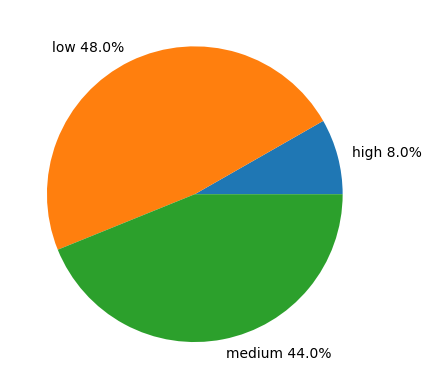

In [41]:
plt.pie(sal.left, labels = sal.label)
plt.show()

In [54]:
#Find out how many left in each department category
dep = df.groupby(['Department'])['left'].count().reset_index().sort_values('left', ascending = False)
dep

,Department,left
7,sales,3239
9,technical,2244
8,support,1821
0,IT,976
1,RandD,694
6,product_mng,686
5,marketing,673
2,accounting,621
3,hr,601
4,management,436


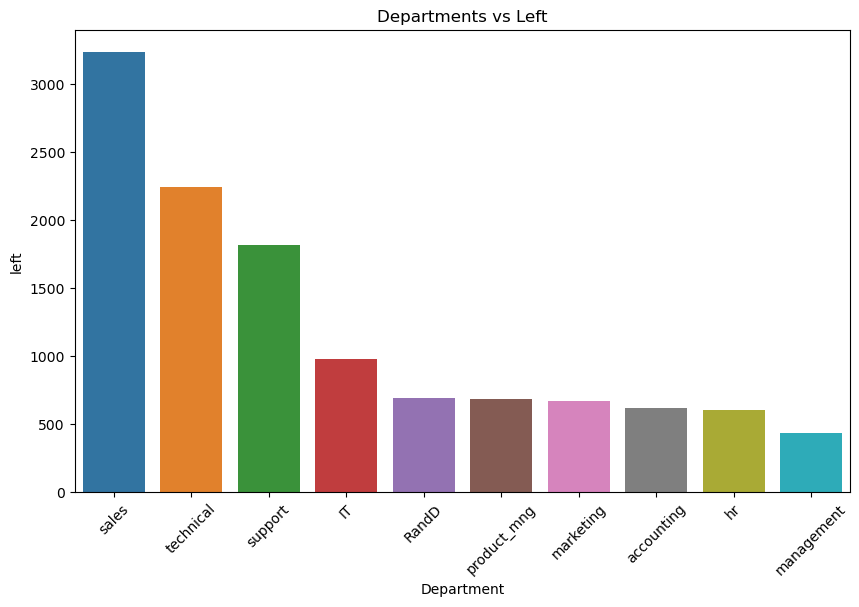

In [55]:
#Barplot for departments vs left
plt.figure(figsize=(10,6))
sns.barplot(data= dep, x='Department', y='left')
plt.xticks(rotation = 45)
plt.title('Departments vs Left')
plt.show()

In [57]:
#Find average satisfaction level for employees who left or stayed
satis = df.groupby(['left'])['satisfaction_level'].mean().reset_index()
satis

,left,satisfaction_level
0,0,0.667365
1,1,0.440271


In [59]:
#Find out how many left in promotion category
promo = df.groupby(['promotion_last_5years'])['left'].count().reset_index()
promo

,promotion_last_5years,left
0,0,11788
1,1,203


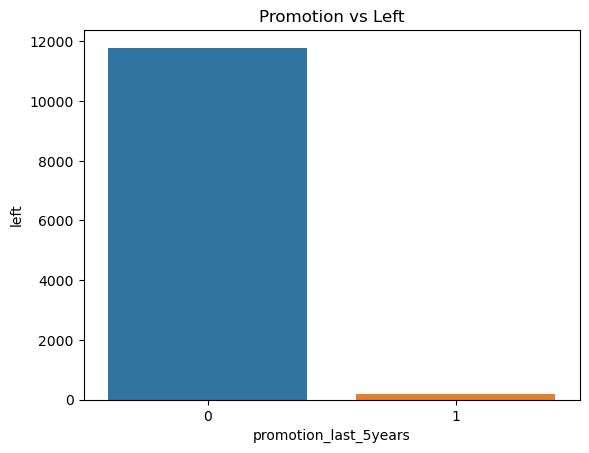

In [63]:
#Barplot for departments vs left
sns.barplot(data= promo, x='promotion_last_5years', y='left')
plt.title('Promotion vs Left')
plt.show()

Found some interesting insights I will detail in analysis report.

## Feature Engineering

In [64]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [72]:
#add dummy variables for categorical columns
model = pd.get_dummies(df, dtype = int, drop_first = True)
model.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


## Logistic Regression

In [73]:
y = model['left']
x1 = model.drop('left',axis=1)
x1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [74]:
x = sm.add_constant(x1)
log_reg = sm.Logit(y,x)
results = log_reg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.357914
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                11991
Model:                          Logit   Df Residuals:                    11972
Method:                           MLE   Df Model:                           18
Date:                Thu, 13 Jun 2024   Pseudo R-squ.:                  0.2038
Time:                        20:41:56   Log-Likelihood:                -4291.8
converged:                       True   LL-Null:                       -5390.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.1059      0.244     -8.647      0.000      -2.583      -1.629
satisfaction_level        -4.0088      0.121    -33.075      0.000      -4.246      -3.771
last_evaluation            0.6054      0.180      3.360      0.001       0.252       0.959
number_project            -0.2858      0.026    -11.031      0.000      -0.337      -0.235
average_montly_hours       0.0042      0.001      6.688      0.000       0.003       0.005
time_spend_company         0.3082      0.020     15.241      0.000       0.269       0.348
Work_accident             -1.4376      0.111    -12.960      0.000      -1.655      -1.220
promotion_last_5years     -1.4601      0.384     -3.799      0.000      -2.213      -0.707
Department_RandD          -0.3362      0.160     -2.098      0.036      -0.650      -0.022
Department_accounting      0.0159      0.153      0.104      0.917      -0.284       0.316
Department_hr              0.1637      0.151      1.081      0.280      -0.133       0.461
Department_management     -0.2058      0.191     -1.077      0.281      -0.580       0.169
Department_marketing       0.0659      0.152      0.434      0.664      -0.232       0.364
Department_product_mng    -0.0089      0.150     -0.059      0.953      -0.303       0.286
Department_sales           0.0718      0.110      0.651      0.515      -0.144       0.288
Department_support         0.1425      0.119      1.194      0.232      -0.091       0.376
Department_technical       0.1092      0.116      0.945      0.345      -0.117       0.336
salary_low                 1.8320      0.164     11.177      0.000       1.511       2.153
salary_medium              1.3831      0.165      8.394      0.000       1.060       1.706
==========================================================================================
"""

In [83]:
#Confustion matrix
cm = pd.DataFrame(results.pred_table())
cm

,0,1
0,9575.0,425.0
1,1562.0,429.0


In [84]:
#Compute accuracy of lostic regression model
accuracy = (cm.iloc[0,0]+cm.iloc[1,1])/(cm.iloc[0,0]+cm.iloc[1,1]+cm.iloc[0,1]+cm.iloc[1,0])

In [82]:
accuracy

0.8342923859561338

All departments except RandD are insignificant and I will ignore.

In [98]:
coef = pd.DataFrame(results.params)
coef.columns = ['coef']

In [99]:
pv = pd.DataFrame(round(results.pvalues,3))
pv.columns = ['p-values']

In [101]:
logit = pd.concat([coef, pv],axis = 1)

In [103]:
logit = logit[logit['p-values']<=0.05]

In [107]:
logit['odds']=np.exp(logit['coef'])
logit = logit.drop('const', axis=0)
logit

,coef,p-values,odds
satisfaction_level,-4.008805,0.000,0.018155
last_evaluation,0.605436,0.001,1.832051
number_project,-0.285829,0.000,0.751391
average_montly_hours,0.004161,0.000,1.004169
time_spend_company,0.308224,0.000,1.361005
Work_accident,-1.437555,0.000,0.237508
promotion_last_5years,-1.460056,0.000,0.232223
Department_RandD,-0.336229,0.036,0.714460
salary_low,1.831987,0.000,6.246288
salary_medium,1.383149,0.000,3.987437


In [115]:
logit['odds %'] = round((logit.odds-1)*100)

In [116]:
logit

,coef,p-values,odds,odds %
satisfaction_level,-4.008805,0.000,0.018155,-98.0
last_evaluation,0.605436,0.001,1.832051,83.0
number_project,-0.285829,0.000,0.751391,-25.0
average_montly_hours,0.004161,0.000,1.004169,0.0
time_spend_company,0.308224,0.000,1.361005,36.0
Work_accident,-1.437555,0.000,0.237508,-76.0
promotion_last_5years,-1.460056,0.000,0.232223,-77.0
Department_RandD,-0.336229,0.036,0.714460,-29.0
salary_low,1.831987,0.000,6.246288,525.0
salary_medium,1.383149,0.000,3.987437,299.0


Odds meaure an increase in 1 unit of that variable gives odds of the employee leaving.

- Logistic regression shows that compared to having a high salary there is 525% chance of a low salary employee leaving, 299% chance of employee leaving.
- RandD 29% less likely to leave than people in IT.
- increasing satifaction level by 1 leads to 98% chance of not leaving.
- No evaluation in 1 yr period leads to 83% chance of leaving.
- A promotion in last 5 years leads to 77% chance of not leaving.
- Increase in no. of projects by 1 leads to 25% chance of leaving.
- Work accident says increase in one accident leads to 76% of not leaving (model may of misinterpreted this variable).
- Each extra year spent at company leads to 36% of leaving.

## Random Forest Regression

In [117]:
model2 = pd.get_dummies(df, dtype = int)
model2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [118]:
y = model2['left']
X = model2.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [122]:
k=10

In [124]:
mse_list=[]
r2_list=[]
for i in range(k):
    rf_regressor = RandomForestRegressor(n_estimators = 100, random_state=i)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    mse= mean_squared_error(y_test, y_pred)
    r2= r2_score(y_test, y_pred)

    mse_list.append(mse)
    r2_list.append(r2)

    print(f'Model {i+1}:')
    print(f' MSE: {mse}')
    print(f' R2: {r2}')
    print()

avg_mse = np.mean(mse_list)
avg_r2 = np.mean(r2_list)

print(f'Average MSE: {avg_mse}')
print(f'Average R2: {avg_r2}')




Model 1:
 MSE: 0.01971108795331388
 R2: 0.8584104389926086

Model 2:
 MSE: 0.019744685285535638
 R2: 0.8581691011460338

Model 3:
 MSE: 0.019798082534389326
 R2: 0.8577855356603487

Model 4:
 MSE: 0.01945831596498541
 R2: 0.8602261619474836

Model 5:
 MSE: 0.019757732388495205
 R2: 0.8580753806175253

Model 6:
 MSE: 0.019589412255106294
 R2: 0.8592844652632683

Model 7:
 MSE: 0.019874322634431014
 R2: 0.8572378843931213

Model 8:
 MSE: 0.019794289287202997
 R2: 0.8578127834817362

Model 9:
 MSE: 0.019774989578991244
 R2: 0.8579514180015427

Model 10:
 MSE: 0.019709420591913298
 R2: 0.8584224160569547

Average MSE: 0.01972123384743643
Average R2: 0.8583375585560622


In [125]:
feature_importances = rf_regressor.feature_importances_
feature_names = list(X.columns)

In [126]:
feature_importances

array([4.51721174e-01, 1.28950482e-01, 1.72646373e-01, 1.15071326e-01,
       1.10640813e-01, 1.24824555e-03, 6.97369028e-05, 8.92766251e-04,
       1.21575960e-03, 1.44116786e-03, 6.27082382e-04, 1.01205266e-03,
       8.68621040e-04, 5.27687463e-04, 3.25070512e-03, 1.61003526e-03,
       2.04763211e-03, 4.51291392e-04, 3.47930984e-03, 2.22773776e-03])

In [134]:
features = pd.DataFrame({'Feature Names':feature_names, 'Feature Importances':feature_importances}).sort_values('Feature Importances', ascending=False)

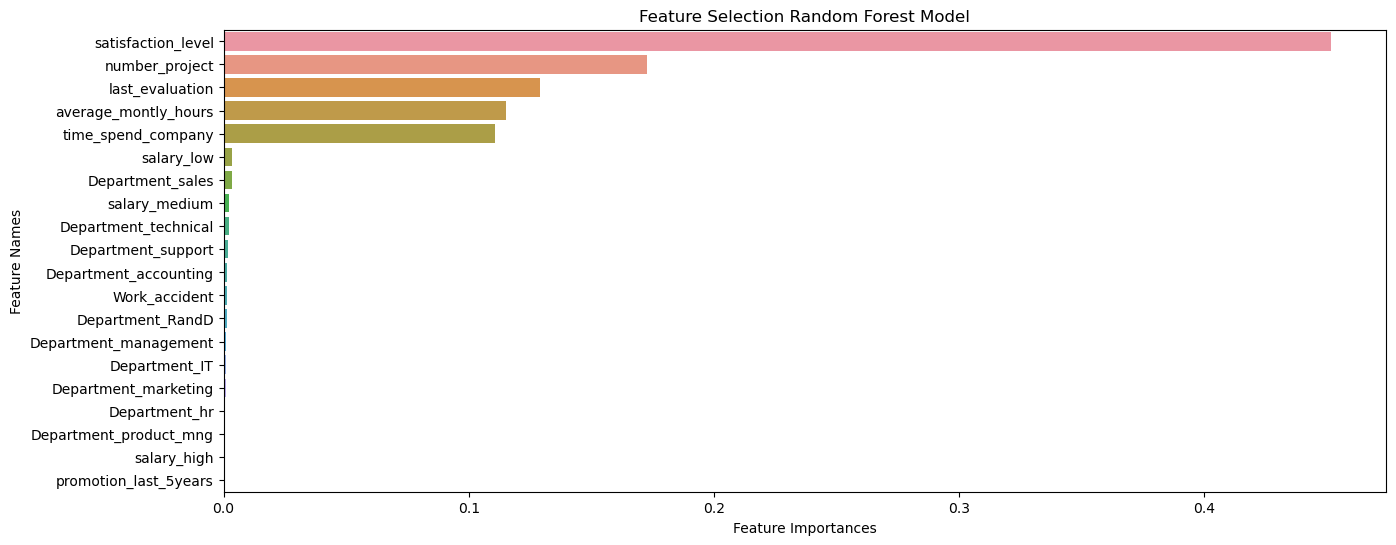

In [160]:
plt.figure(figsize=(15,6))
sns.barplot(data = features, x = 'Feature Importances', y = 'Feature Names')
plt.title('Feature Selection Random Forest Model')
plt.show()

- Random Forest Regression shows satisfaction level is most important feature in determing whether an employee leaves with a score of 0.45.
- The next important features are number of projects, last evaluation, average monthly houts and time spent at company, respectively.
- The other factors have near 0 importance.
- Average MSE was 0.019 and R2 was 0.86. This shows this is an excellent model with near 0 error and most of the data variability accounted for.
- This gives us high accuracy that above factors are crucial in determining whether an employee leaves.
- Combining this model with logistic model gives us clear insight into what causes employees to leave.
- I will use this model to showcase some more visuals on most important factors then write detailed report for client.

In [139]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Further EDA into Important Factors

In [147]:
#Explore left vs number of projects
df.groupby('left')['number_project'].mean().reset_index()

,left,number_project
0,0,3.786800
1,1,3.883476


In [149]:
#Explore left vs last eval 
df.groupby('left')['last_evaluation'].mean().reset_index()

,left,last_evaluation
0,0,0.715667
1,1,0.721783


In [150]:
#Explore left vs last eval 
df.groupby('left')['time_spend_company'].mean().reset_index()

,left,time_spend_company
0,0,3.262000
1,1,3.881467


- on average people who left or stayed did same number of projects, people who left did slightly more.
- on average people who left had a higher last evaluation
- on average people who left spent more time at company
- We can combine insights from logistic model and Random Forest model to now provide summary for client and recommendations.

In [159]:
odds_pct= logit['odds %'].reset_index()
odds_pct.columns = ('Sig Factor','odds %')
odds_pct

,Sig Factor,odds %
0,satisfaction_level,-98.0
1,last_evaluation,83.0
2,number_project,-25.0
3,average_montly_hours,0.0
4,time_spend_company,36.0
5,Work_accident,-76.0
6,promotion_last_5years,-77.0
7,Department_RandD,-29.0
8,salary_low,525.0
9,salary_medium,299.0
